## TOC:
* [Setup](#first-bullet)
* [Introduction to Depth Estimation](#second-bullet)
* [Mathematical Foundations](#third-bullet)
* [Popular Techniques for Depth Estimation](#forth-bullet)
* [Neural Network Architectures for Depth Estimation](#fifth-bullet)
* [Code Implementation: Depth Estimation using Pretrained Models](#sixth-bullet)
* [Training Depth Estimation Models](#seventh-bullet)
* [Datasets and Metrics](#eigth-bullet)
* [TLDR](#last-bullet)

## Setup <a class="anchor" id="first-bullet"></a>

## Introduction to Depth Estimation <a class="anchor" id="second-bullet"></a>

Depth estimation refers to the process of determining the distance of objects in a scene from a viewpoint. 
It plays a crucial role in computer vision for achieving 3D understanding from 2D images.

### **Key Importance:**
- Enables applications such as 3D reconstruction, autonomous driving, and augmented reality.
- Bridges the gap between 2D image analysis and 3D perception.

### **Real-Life Applications**

1. **Autonomous Vehicles**: Depth estimation helps detect obstacles, measure distances, and assist in navigation.
2. **AR/VR**: Augmented reality applications use depth for virtual object placement in real environments.
3. **Robotics**: Robots require depth information for object manipulation and navigation.
4. **Healthcare**: Depth imaging helps in medical imaging and surgery assistance.
5. **Photography**: Enhances depth-of-field effects and 3D modeling.

## Mathematical Foundations <a class="anchor" id="third-bullet"></a>

### **Stereo Vision**

Depth estimation is often derived from stereo vision, using the disparity between left and right camera images.

#### Formula:
Depth (D) = (focal_length * baseline) / disparity

- **Focal length**: Distance between the lens and sensor.
- **Baseline**: Distance between the two camera centers.
- **Disparity**: Pixel difference between corresponding points in the two images.

### **Monocular Depth Estimation**
Monocular depth estimation relies on single images. Neural networks predict depth using learned patterns and features. Ill-formed problem, not so easy to trackle.

## Popular Techniques for Depth Estimation <a class="anchor" id="forth-bullet"></a>

1. **Stereo Depth Estimation**
   - Uses two images for computing disparity and depth.
   - Requires calibration.

2. **Monocular Depth Estimation**
   - Predicts depth from a single image using neural networks.
   - Example models: DPT (Dense Prediction Transformer).

3. **LiDAR-based Depth Estimation**
   - Uses active sensors like LiDAR for accurate depth mapping.

4. **Neural Networks**
   - Architectures like U-Net, ResNet, and Transformers.

5. **Learning-based Approaches**
   - Supervised, semi-supervised, and self-supervised methods.

## Neural Network Architectures for Depth Estimation <a class="anchor" id="fifth-bullet"></a>

1. **U-Net**: Popular for pixel-wise predictions.
2. **ResNet-based Models**: Provides deep feature extraction.
3. **Transformers**: Models like DPT leverage transformer-based architectures for better global context.

Google has been at the forefront of advancing depth estimation technologies, particularly in the context of augmented reality (AR) and mobile applications.
* MediaPipe Iris:
    * Google introduced MediaPipe Iris, a real-time iris tracking solution capable of estimating the distance of a subject from the camera with less than 10% error, without requiring specialized hardware. 
* ARCore Depth API:
    * Google's ARCore platform includes a Depth API that uses depth-from-motion algorithms to create depth images, providing a 3D view of the world. This enables more realistic AR experiences by allowing virtual objects to interact with the real world in a depth-aware manner. 
* MiDaS:
    * While not developed by Google, MiDaS is a notable model for monocular depth estimation that computes relative depth from a single image. It offers multiple models catering to different use cases, from high-speed to high-accuracy requirements.
* Marigold:
    * It leverages the rich visual knowledge stored in modern generative image models to predict depth from a single image. This approach allows for zero-shot transfer to unseen data, offering state-of-the-art monocular depth estimation results. 

# Neural Network Architectures for Depth Estimation

---

## 1. U-Net
### Overview
- A convolutional neural network designed for pixel-wise predictions like segmentation and depth estimation.
- Features an **encoder-decoder architecture** with **skip connections** to preserve spatial details.

### Components
1. **Encoder (Downsampling):**
   - Extracts hierarchical features using convolutional layers, ReLU, and max-pooling.
2. **Bottleneck:**
   - Captures complex patterns and relationships at the lowest spatial resolution.
3. **Decoder (Upsampling):**
   - Restores spatial resolution using transposed convolutions.
   - Includes **skip connections** to merge low-level and high-level features.
4. **Output Layer:**
   - Final convolution predicts depth or segmentation at the pixel level.

### Flow
1. Input image.
2. Downsampling in the encoder.
3. Feature extraction in the bottleneck.
4. Upsampling in the decoder with skip connections.
5. Output dense prediction (e.g., depth map).

---

## 2. ResNet (Residual Networks)
### Overview
- A deep convolutional neural network with **residual blocks** to mitigate the vanishing gradient problem.
- Facilitates efficient training of very deep models.

### Components
1. **Residual Blocks:**
   - Shortcut connections add input directly to the output:
     $$
     y = F(x) + x
     $$
   - Enables learning of residual functions.
2. **Bottleneck Blocks:**
   - Combines 1x1 and 3x3 convolutions for efficient feature extraction in deeper models.
3. **Deep Stacking:**
   - Architectures like ResNet-50 and ResNet-101 stack multiple residual blocks.

### Flow
1. Input image.
2. Pass through initial convolutional and pooling layers.
3. Extract hierarchical features via stacked residual blocks.
4. Output dense features for depth estimation or other tasks.


---

## 3. Transformers (e.g., Dense Prediction Transformer - DPT)
### Overview
- Vision transformers use **self-attention** to model long-range dependencies and global context in images.
- Combines transformer-based feature extraction with convolutional decoders for dense predictions.

### Components
1. **Image Embedding:**
   - Splits the input image into patches, flattened and embedded as tokens.
2. **Transformer Backbone:**
   - Processes tokens with **multi-head self-attention (MHSA)** and **feed-forward layers**.
   - Positional encodings add spatial information to the token embeddings.
3. **Decoder with Feature Fusion:**
   - Uses skip connections to merge features at multiple scales from the transformer backbone.
   - Fusion integrates global context from the transformer and local details from intermediate layers.
4. **Output Layer:**
   - Produces dense predictions, such as depth maps.

### Flow
1. Input image.
2. Split into patches and embed as tokens.
3. Pass through transformer backbone for global feature extraction.
4. Fuse global and local features in the decoder.
5. Output dense depth map.

![image info](.\dpt_architecture.jpg "Title")
##### DPT architecture. Taken from the https://arxiv.org/abs/2103.13413
---

## 4. Marigold (Diffusion Models by Google)
### Overview
- Leverages **diffusion models** for monocular depth estimation, using generative priors for zero-shot capabilities.

### Components
1. **Diffusion Process:**
   - Adds noise progressively to images; the model learns to reverse the process.
2. **U-Net Backbone:**
   - Denoising network for reconstructing depth maps during the diffusion process.
3. **Generative Priors:**
   - Captures high-level semantics from pretrained generative models.

### Flow
1. Input image with added noise.
2. Progressive denoising using the diffusion model.
3. Pass through U-Net backbone for noise removal and depth reconstruction.
4. Output dense depth map.

![image info](.\marigold.png "Title")

##### Marigold arhitecture. Taken from the https://ar5iv.labs.arxiv.org/html/2312.02145
---

## 5. MiDaS (Monocular Depth Approximation System)
### Overview
- A monocular depth estimation system trained on diverse datasets for generalization across environments.

### Components
1. **Backbone:**
   - Uses ResNet or Vision Transformers (ViT) to extract hierarchical features.
2. **Decoder:**
   - Converts features into dense depth maps with multi-scale feature fusion.
3. **Pretraining:**
   - Trained on datasets like MegaDepth and ReDWeb for cross-domain performance.

### Flow
1. Input image.
2. Pass through the backbone (ResNet or ViT) to extract features.
3. Decode features into a dense depth map.
4. Output depth prediction.

##### MiDaS arhitecture: https://medium.com/@akp83540/midas-net-architecture-b4c467afca47
---

## 6. ARCore Depth API
### Overview
- A depth estimation framework by Google for mobile AR, using RGB camera and motion data.

### Components
1. **Depth-from-Motion:**
   - Estimates depth by analyzing frame-to-frame motion of visual features.
2. **Real-Time Updates:**
   - Generates dense depth maps dynamically as the camera moves.
3. **Depth SDK:**
   - Provides APIs for depth-aware AR development.

### Flow
1. Input RGB video feed and motion tracking data.
2. Compute feature correspondences between consecutive frames.
3. Estimate depth for each frame in real time.
4. Output dynamic depth maps.

---

## Comparison Table

| **Feature**              | **U-Net**                 | **ResNet**              | **Transformers (DPT)**  | **Marigold**            | **MiDaS**                 | **ARCore Depth API**        |
|---------------------------|---------------------------|--------------------------|--------------------------|--------------------------|----------------------------|-----------------------------|
| **Global Context**        | No                       | Limited                 | Yes                     | Yes                     | Moderate                  | Moderate                   |
| **Local Precision**       | High                     | High                    | High                    | Moderate                | High                      | Moderate                   |
| **Performance on Depth**  | Moderate                 | High                    | High                    | High                    | High                      | Real-time (Mobile AR)      |
| **Hardware Requirements** | None                     | None                    | GPU                     | GPU                     | None                      | ARCore-compatible devices  |
| **Real-Time Support**     | No                       | No                      | Yes (with optimizations)| No                      | Yes                      | Yes                        |

---

## Additional Notes on DPT's Fusion
- **Feature Fusion in DPT**:
  - Fusion refers to combining **global context** (from deeper layers of the transformer) with **local details** (from earlier transformer layers).
  - This multi-scale integration helps balance coarse global understanding with fine-grained spatial precision, crucial for accurate depth maps.

---

This markdown includes the flow of each architecture and integrates detailed explanations of their components and use cases. Let me know if you need further adjustments!


## Training Depth Estimation Models <a class="anchor" id="seventh-bullet"></a>

# Torch Data Setup

1. Windows Multiprocessing Behavior \
On Windows, the default multiprocessing start method is spawn, which can cause issues with PyTorch DataLoader if global variables or objects are not handled properly.

In [12]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms.functional as TF
import torch.nn.functional as F

from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np

import torch.multiprocessing as mp
mp.set_start_method('spawn', force=True)

In [2]:
class KittiDepthDataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None, max_samples=None, depth_size=None):
        """
        Args:
            root_dir (str): Path to the KITTI dataset root directory.
            split (str): Either 'train' or 'test'.
            transform (callable, optional): Transformation to be applied on a sample.
            max_samples (int, optional): Maximum number of image-depth pairs to load.
        """
        self.root_dir = root_dir
        self.split = split
        self.transform = transform
        self.depth_size = depth_size
        self.image_paths = []
        self.depth_paths = []

        # Walk through the directory structure and gather image and depth pairs
        base_path = os.path.join(root_dir, split)
        for date_folder in os.listdir(base_path):
            date_folder_path = os.path.join(base_path, date_folder)
            for driver_folder in os.listdir(date_folder_path):
                driver_folder_path = os.path.join(date_folder_path, driver_folder, 'image_02', 'data')
                depth_folder_path = os.path.join(date_folder_path, driver_folder, 'proj_depth', 'groundtruth', 'image_02')

                image_files = sorted(os.listdir(driver_folder_path))
                depth_files = sorted(os.listdir(depth_folder_path))

                # Ensure that images and depth maps match 1:1
                for img, depth in zip(image_files, depth_files):
                    self.image_paths.append(os.path.join(driver_folder_path, img))
                    self.depth_paths.append(os.path.join(depth_folder_path, depth))

        # Limit the number of samples if max_samples is provided
        if max_samples:
            self.image_paths = self.image_paths[:max_samples]
            self.depth_paths = self.depth_paths[:max_samples]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        depth_path = self.depth_paths[idx]

        # Load image and depth map
        image = Image.open(img_path).convert('RGB')  # RGB image (H, W, 3)
        depth = Image.open(depth_path)  # Grayscale depth map (H, W)

        # print()
        # print(np.array(image).shape, np.array(depth).shape)

        # Ensure depth map is in grayscale mode 'L'
        if depth.mode != 'L':
            depth = depth.convert('L')

        # Apply transforms (e.g., resizing, normalization)
        if self.transform:
            image = self.transform(image)

        # Resize depth map to match image dimensions
        if self.depth_size:
            depth = TF.resize(depth, size=self.depth_size, interpolation=TF.InterpolationMode.BILINEAR)

        # Convert depth to tensor
        depth = np.array(depth).astype(np.float32) / 256.0  # Normalize if needed
        depth = torch.from_numpy(depth).unsqueeze(0)  # Add channel dimension: (1, H, W)

        # print()
        # print(np.array(image).shape, np.array(depth).shape)

        return image, depth


# Usage Example:
from torchvision import transforms

# Define transformations
transform = transforms.Compose([
    transforms.Resize((192, 640)),  # Resize images to smaller dimensions
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize RGB
])

# Create dataset and dataloader with a maximum of 100 samples
kitti_dataset_path = r'../data/KITTI eigen split'
train_dataset = KittiDepthDataset(root_dir=kitti_dataset_path, split='train', transform=transform, max_samples=1000, depth_size=(192, 640))
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)

# Iterate through the dataloader
next(iter(train_loader))

[tensor([[[[ 0.5707,  0.5878,  0.5878,  ..., -1.1589, -1.3130, -1.3987],
           [ 0.6221,  0.6392,  0.6563,  ..., -1.4329, -1.5185, -1.4672],
           [ 0.6563,  0.7077,  0.7591,  ..., -1.6555, -1.4329, -1.4672],
           ...,
           [ 1.1872,  1.1187,  1.0502,  ..., -1.9124, -1.9124, -1.8439],
           [ 1.3927,  1.1358,  0.8961,  ..., -1.8439, -1.8610, -1.7754],
           [ 1.3755,  1.3927,  1.2728,  ..., -1.7240, -1.7583, -1.7583]],
 
          [[ 2.4286,  2.4286,  2.4286,  ..., -1.2129, -1.2304, -1.2304],
           [ 2.4286,  2.4286,  2.4286,  ..., -1.5280, -1.4755, -1.3354],
           [ 2.4286,  2.4286,  2.4286,  ..., -1.4930, -1.2829, -1.3179],
           ...,
           [ 1.1856,  1.0630,  0.9055,  ..., -1.8256, -1.7906, -1.7906],
           [ 1.3081,  1.2731,  1.0455,  ..., -1.7206, -1.7206, -1.6506],
           [ 1.5007,  1.3431,  1.3431,  ..., -1.6506, -1.6331, -1.6681]],
 
          [[ 2.6400,  2.6400,  2.6400,  ..., -1.3513, -1.4210, -1.4384],
           [ 

In [3]:
# for img_path, depth_path in zip(train_dataset.image_paths, train_dataset.depth_paths):
#     try:
#         img = Image.open(img_path)
#         depth = Image.open(depth_path)
#     except Exception as e:
#         print(f"Error loading {img_path} or {depth_path}: {e}")

# GAN

1. Define the Generator \
The generator predicts the depth map from an RGB image. You can use an encoder-decoder architecture, such as a U-Net or a ResNet-based design.

In [4]:
class DepthGenerator(nn.Module):
    def __init__(self):
        super(DepthGenerator, self).__init__()
        # ResNet encoder
        self.encoder = models.resnet50(pretrained=True)
        self.encoder = nn.Sequential(*list(self.encoder.children())[:-2])  # Remove fully connected layers

        # Decoder with transposed convolutions
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(2048, 512, kernel_size=4, stride=2, padding=1),  # (12, 40)
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),  # (24, 80)
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # (48, 160)
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),   # (96, 320)
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1)      # (192, 640)
        )

    def forward(self, x):
        # Encode
        x = self.encoder(x)
        # print(f"Encoder output shape: {x.shape}")

        # Decode
        x = self.decoder(x)
        # print(f"Decoder output shape: {x.shape}")
        return x

# Instantiate generator
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = DepthGenerator().to(device)

e:\ProgramingTools\anaconda_gus\envs\conda_fii_cv_3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\ProgramingTools\anaconda_gus\envs\conda_fii_cv_3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
# Test input
sample_input = torch.randn(1, 3, 192, 640).to(device)  # Batch of 1, RGB input
sample_output = generator(sample_input)
print(f"Generator output shape: {sample_output.shape}")

Generator output shape: torch.Size([1, 1, 192, 640])


2. Define the Discriminator \
The discriminator learns to classify real depth maps and generated depth maps. It can use a fully convolutional architecture.

In [6]:
import torch.nn.functional as F

In [7]:
class DepthDiscriminator(nn.Module):
    def __init__(self):
        super(DepthDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(4, 64, kernel_size=4, stride=2, padding=1),  # Input: [RGB, Depth]
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 1, kernel_size=4, stride=1, padding=0),
            nn.Sigmoid()  # Output: Probability of being real
        )

    def forward(self, rgb, depth):
        # Concatenate RGB and depth
        # print(f"RGB shape: {rgb.shape}, Depth shape: {depth.shape}")
        x = torch.cat([rgb, depth], dim=1)  # Concatenate along channel dimension
        # print(f"RGB shape: {rgb.shape}, Depth shape: {depth.shape}, Concatenated shape: {x.shape}")
        return self.model(x)

# Instantiate discriminator
discriminator = DepthDiscriminator().to(device)

3. Define Loss Functions \
You need both the adversarial loss and a reconstruction loss (e.g., L1 or Scale-Invariant Loss) to supervise the generator.

In [8]:
import torch.nn.functional as F

# Adversarial loss for discriminator and generator
adversarial_loss = nn.BCELoss()

def reconstruction_loss(pred, target):
    """
    Compute L1 reconstruction loss between predicted and ground truth depth maps.

    Args:
        pred (torch.Tensor): Predicted depth map (B, 1, H, W).
        target (torch.Tensor): Ground truth depth map (B, 1, H, W).

    Returns:
        torch.Tensor: L1 loss.
    """
    return F.l1_loss(pred, target)

4. Define Training Process \
Train the generator and discriminator alternately.

In [9]:
from tqdm import tqdm
import torch.optim as optim

# Instantiate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr_g = 0.0001
lr_d = 0.0004
beta1 = 0.5
beta2 = 0.999
optimizer_G = optim.Adam(generator.parameters(), lr=lr_g, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(beta1, beta2))
num_epochs = 10


In [10]:
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

generator.apply(weights_init)
discriminator.apply(weights_init)

DepthDiscriminator(
  (model): Sequential(
    (0): Conv2d(4, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 1, kernel_size=(4, 4), stride=(1, 1))
    (9): Sigmoid()
  )
)

In [11]:
for epoch in range(num_epochs):
    generator.train()
    discriminator.train()
    
    epoch_g_loss = 0.0
    epoch_d_loss = 0.0

    for images, depths in tqdm(train_loader):
        images = images.to(device)
        depths = depths.to(device)

        # print(images.shape, depths.shape)

        # -------------------
        # Train Discriminator
        # -------------------
        optimizer_D.zero_grad()

        # Real depth map
        real_outputs = discriminator(images, depths)
        real_loss = adversarial_loss(real_outputs, torch.ones_like(real_outputs))

        # Fake depth map
        fake_depths = generator(images)
        fake_outputs = discriminator(images, fake_depths.detach())
        fake_loss = adversarial_loss(fake_outputs, torch.zeros_like(fake_outputs))

        # Total discriminator loss
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # -------------------
        # Train Generator
        # -------------------
        optimizer_G.zero_grad()

        # Adversarial loss for generator
        fake_outputs = discriminator(images, fake_depths)
        g_adv_loss = adversarial_loss(fake_outputs, torch.ones_like(fake_outputs))

        # Reconstruction loss
        g_rec_loss = reconstruction_loss(fake_depths, depths)

        # Total generator loss (weighted)
        g_loss = g_adv_loss + 10.0 * g_rec_loss  # lambda_rec = 10.0
        g_loss.backward()
        optimizer_G.step()

        epoch_d_loss += d_loss.item()
        epoch_g_loss += g_loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {epoch_d_loss / len(train_loader):.4f}, G Loss: {epoch_g_loss / len(train_loader):.4f}")

100%|██████████| 250/250 [00:28<00:00,  8.90it/s]


Epoch [1/10], D Loss: 1.3739, G Loss: 2.0967


100%|██████████| 250/250 [00:28<00:00,  8.70it/s]


Epoch [2/10], D Loss: 1.3462, G Loss: 1.8745


100%|██████████| 250/250 [00:28<00:00,  8.85it/s]


Epoch [3/10], D Loss: 1.3484, G Loss: 1.9479


100%|██████████| 250/250 [00:28<00:00,  8.87it/s]


Epoch [4/10], D Loss: 1.3484, G Loss: 1.9715


100%|██████████| 250/250 [00:28<00:00,  8.91it/s]


Epoch [5/10], D Loss: 1.3487, G Loss: 1.9895


100%|██████████| 250/250 [00:27<00:00,  8.96it/s]


Epoch [6/10], D Loss: 1.3529, G Loss: 1.9831


100%|██████████| 250/250 [00:28<00:00,  8.84it/s]


Epoch [7/10], D Loss: 1.3569, G Loss: 1.9674


100%|██████████| 250/250 [00:28<00:00,  8.79it/s]


Epoch [8/10], D Loss: 1.3594, G Loss: 1.9521


100%|██████████| 250/250 [00:27<00:00,  9.00it/s]


Epoch [9/10], D Loss: 1.3586, G Loss: 1.9234


100%|██████████| 250/250 [00:27<00:00,  8.98it/s]

Epoch [10/10], D Loss: 1.3631, G Loss: 1.9087


In [13]:
torch.save(generator.state_dict(), "generator.pth")

e:\ProgramingTools\anaconda_gus\envs\conda_fii_cv_3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\ProgramingTools\anaconda_gus\envs\conda_fii_cv_3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Gus\AppData\Local\Temp\ipykernel_29648\2065324705.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See

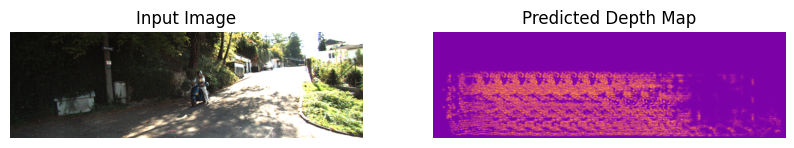

In [17]:
# Load the pre-trained generator
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = DepthGenerator().to(device)
generator.load_state_dict(torch.load("generator.pth", map_location=device))
generator.eval()

# Define preprocessing transforms
preprocess = transforms.Compose([
    transforms.Resize((192, 640)),  # Match training input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Match training normalization
])

def generate_depth_map(image_path):
    # Load and preprocess the input image
    image = Image.open(image_path).convert('RGB')
    input_tensor = preprocess(image).unsqueeze(0).to(device)  # Add batch dimension

    # Generate depth map
    with torch.no_grad():
        predicted_depth = generator(input_tensor)

    # Convert the depth map to a NumPy array for visualization
    predicted_depth = predicted_depth.squeeze().cpu().numpy()

    return predicted_depth

# Test inference on a new image
image_path = r"..\data\KITTI eigen split\test\2011_09_26\2011_09_26_drive_0086_sync\image_02\data\0000000007.png"
predicted_depth = generate_depth_map(image_path)

# Visualize the input and output
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(Image.open(image_path))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Predicted Depth Map")
plt.imshow(predicted_depth, cmap="plasma")
plt.axis("off")

plt.show()

# Diffusion Model train

1. Core Components of Diffusion Models for Depth Estimation \
* Forward Process: Gradually adds noise to the depth map (like Gaussian noise) over a series of timesteps.
* Reverse Process: The model learns to denoise the corrupted depth maps step-by-step to recover the original depth map.
* Conditioning: The RGB image serves as a conditioning input to guide the denoising process.

## 2. Define the Diffusion Framework
We use the forward diffusion and reverse denoising processes:

### 2.1 Forward Diffusion Process
The forward process adds Gaussian noise to the depth map $ x_0 $ at each timestep $ t $, producing noisy versions $ x_t $.

$$
x_t = \alpha_t x_0 + (1 - \alpha_t) \epsilon, \quad \epsilon \sim \mathcal{N}(0, I)
$$

Where $ \alpha_t $ are noise schedule coefficients.

### 2.2 Reverse Denoising Process
The reverse process denoises $ x_t $ step-by-step, conditioned on the RGB image $ c $, to recover $ x_0 $.

$$
\hat{x}_0 = \text{model}(x_t, c, t)
$$

3.1 Define the U-Net Denoiser

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNetDenoiser(nn.Module):
    def __init__(self, in_channels=4, out_channels=1):
        super(UNetDenoiser, self).__init__()

        def down_block(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_ch, out_ch, kernel_size=3, stride=2, padding=1),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True),
            )

        def up_block(in_ch, out_ch):
            return nn.Sequential(
                nn.ConvTranspose2d(in_ch, out_ch, kernel_size=3, stride=2, padding=1, output_padding=1),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_ch, out_ch, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True),
            )

        self.down1 = down_block(in_channels, 64)
        self.down2 = down_block(64, 128)
        self.down3 = down_block(128, 256)

        self.middle = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
        )

        self.up3 = up_block(512 + 256, 256)
        self.up2 = up_block(256 + 128, 128)
        self.up1 = up_block(128 + 64, 64)

        self.final = nn.Conv2d(64, out_channels, kernel_size=3, stride=1, padding=1)

        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.ConvTranspose2d):
            nn.init.xavier_normal_(module.weight)
            if module.bias is not None:
                nn.init.constant_(module.bias, 0)
        elif isinstance(module, nn.BatchNorm2d):
            nn.init.constant_(module.weight, 1)
            nn.init.constant_(module.bias, 0)

    def forward(self, x, condition):
        # Encoder
        d1 = self.down1(torch.cat([x, condition], dim=1))
        d2 = self.down2(d1)
        d3 = self.down3(d2)

        # Bottleneck
        m = self.middle(d3)

        # Decoder with skip connections
        u3 = self.up3(torch.cat([m, d3], dim=1))
        u2 = self.up2(torch.cat([u3, d2], dim=1))
        u1 = self.up1(torch.cat([u2, d1], dim=1))

        # Final output
        return self.final(u1)

3.2 Diffusion Helper Functions

In [55]:
class DiffusionModel:
    def __init__(self, timesteps=1000, device=torch.device("cpu")):
        self.timesteps = timesteps
        self.device = device
        
        # self.betas = torch.linspace(1e-4, 0.02, timesteps, device=device)
        self.betas = torch.linspace(1e-6, 1e-3, timesteps, device=device)  # Reduced range

        self.alphas = 1.0 - self.betas
        self.alpha_cumprod = torch.cumprod(self.alphas, dim=0).to(device)
        self.alpha_cumprod_prev = F.pad(self.alpha_cumprod[:-1], (1, 0), value=1.0).to(device)

    def forward_process(self, x_0, t):
        """Add noise to x_0 at timestep t."""
        # Move t to the same device as alpha_cumprod
        t = t.to(self.alpha_cumprod.device)

        sqrt_alpha_t = torch.sqrt(self.alpha_cumprod[t]).view(-1, 1, 1, 1)
        sqrt_one_minus_alpha_t = torch.sqrt(1 - self.alpha_cumprod[t]).view(-1, 1, 1, 1)
        noise = torch.randn_like(x_0)
        return sqrt_alpha_t * x_0 + sqrt_one_minus_alpha_t * noise, noise

In [56]:
from tqdm import tqdm

# Instantiate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
denoiser = UNetDenoiser(in_channels=4, out_channels=1).to(device)
diffusion = DiffusionModel(timesteps=1000, device=device)

optimizer = torch.optim.Adam(denoiser.parameters(), lr=1e-5)

# Training
num_epochs = 20
# Training loop
for epoch in range(num_epochs):
    denoiser.train()
    epoch_loss = 0

    for images, depths in tqdm(train_loader):
        images, depths = images.to(device) / 255.0, depths.to(device) / depths.max()  # Normalize inputs

        # Sample a random timestep
        t = torch.randint(0, diffusion.timesteps, (images.size(0),), device=device)

        # Forward process (add noise)
        x_t, noise = diffusion.forward_process(depths, t)

        # Predict noise with the model
        predicted_noise = denoiser(x_t, images)
        # predicted_noise = torch.clamp(predicted_noise, -1.0, 1.0)  # Constrain predictions

        # Loss: MSE between predicted and actual noise
        # loss = F.mse_loss(predicted_noise, noise)
        # Verify that the loss function is numerically stable. Switch from MSE to Huber Loss (less sensitive to large outliers):
        loss = F.smooth_l1_loss(predicted_noise, noise)  # Huber Loss

        # Add L2 regularization
        l2_reg = sum(param.pow(2.0).sum() for param in denoiser.parameters())
        loss += 1e-5 * l2_reg

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(denoiser.parameters(), max_norm=1.0)

        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

100%|██████████| 250/250 [00:31<00:00,  7.89it/s]


Epoch 1/20, Loss: 0.3759


100%|██████████| 250/250 [00:30<00:00,  8.21it/s]


Epoch 2/20, Loss: 0.2080


100%|██████████| 250/250 [00:30<00:00,  8.22it/s]


Epoch 3/20, Loss: 0.1828


100%|██████████| 250/250 [00:30<00:00,  8.19it/s]


Epoch 4/20, Loss: 0.1636


100%|██████████| 250/250 [00:30<00:00,  8.08it/s]


Epoch 5/20, Loss: 0.1517


100%|██████████| 250/250 [00:30<00:00,  8.18it/s]


Epoch 6/20, Loss: 0.1485


100%|██████████| 250/250 [00:30<00:00,  8.19it/s]


Epoch 7/20, Loss: 0.1486


100%|██████████| 250/250 [00:30<00:00,  8.15it/s]


Epoch 8/20, Loss: 0.1390


100%|██████████| 250/250 [00:31<00:00,  7.91it/s]


Epoch 9/20, Loss: 0.1365


100%|██████████| 250/250 [00:31<00:00,  7.88it/s]


Epoch 10/20, Loss: 0.1353


100%|██████████| 250/250 [00:30<00:00,  8.20it/s]


Epoch 11/20, Loss: 0.1339


100%|██████████| 250/250 [00:30<00:00,  8.19it/s]


Epoch 12/20, Loss: 0.1291


100%|██████████| 250/250 [00:30<00:00,  8.19it/s]


Epoch 13/20, Loss: 0.1293


100%|██████████| 250/250 [00:30<00:00,  8.20it/s]


Epoch 14/20, Loss: 0.1242


100%|██████████| 250/250 [00:30<00:00,  8.20it/s]


Epoch 15/20, Loss: 0.1212


100%|██████████| 250/250 [00:30<00:00,  8.18it/s]


Epoch 16/20, Loss: 0.1229


100%|██████████| 250/250 [00:30<00:00,  8.19it/s]


Epoch 17/20, Loss: 0.1214


100%|██████████| 250/250 [00:30<00:00,  8.21it/s]


Epoch 18/20, Loss: 0.1225


100%|██████████| 250/250 [00:30<00:00,  8.19it/s]


Epoch 19/20, Loss: 0.1216


100%|██████████| 250/250 [00:30<00:00,  8.26it/s]

Epoch 20/20, Loss: 0.1179


5. Sampling (Inference)
To generate depth maps, start from pure noise and iteratively denoise.

In [57]:
sample_image_path = r"..\data\KITTI eigen split\test\2011_09_26\2011_09_26_drive_0086_sync\image_02\data\0000000007.png"

In [58]:
def reverse_process(model, condition, timesteps, diffusion):
    """
    Reconstruct the depth map by reversing the diffusion process.
    
    Args:
        model: The trained denoiser (UNetDenoiser).
        condition: The condition image (preprocessed input RGB or grayscale image).
        timesteps: Number of timesteps in the diffusion process.
        diffusion: DiffusionModel instance.

    Returns:
        Reconstructed depth map as a tensor.
    """
    # Start with random noise
    x_t = torch.randn((condition.size(0), 1, condition.size(2), condition.size(3)), device=condition.device)

    for t in reversed(range(timesteps)):
        # Predict noise
        predicted_noise = model(x_t, condition)

        print(f"Predicted noise min: {predicted_noise.min().item()}, max: {predicted_noise.max().item()}")

        # Reverse the diffusion step
        alpha_t = diffusion.alpha_cumprod[t]
        beta_t = diffusion.betas[t]

        epsilon = 1e-5  # Small value to prevent division by zero

        x_t = (1 / torch.sqrt(alpha_t + epsilon)) * (x_t - (1 - alpha_t) * predicted_noise / torch.sqrt(1 - alpha_t + epsilon))

        # Add stochastic noise only when t > 0
        if t > 0:
            noise = torch.randn_like(x_t)
            x_t += torch.sqrt(beta_t + epsilon) * noise

    return x_t

Predicted noise min: -7.454310417175293, max: 6.572996139526367
Predicted noise min: -3.169165849685669, max: 3.112107992172241
Predicted noise min: -2.6006991863250732, max: 2.9463140964508057
Predicted noise min: -3.65733003616333, max: 3.6550562381744385
Predicted noise min: -3.432366132736206, max: 3.5121448040008545
Predicted noise min: -2.7078261375427246, max: 2.757622480392456
Predicted noise min: -3.1909878253936768, max: 2.5704996585845947
Predicted noise min: -3.7311785221099854, max: 3.1707189083099365
Predicted noise min: -4.157513618469238, max: 4.799219608306885
Predicted noise min: -4.329239845275879, max: 6.4948930740356445
Predicted noise min: -4.538277626037598, max: 8.248566627502441
Predicted noise min: -5.000140190124512, max: 10.277569770812988
Predicted noise min: -5.514226913452148, max: 12.676589012145996
Predicted noise min: -6.034075736999512, max: 15.283758163452148
Predicted noise min: -6.419685363769531, max: 18.11189079284668
Predicted noise min: -6.8736

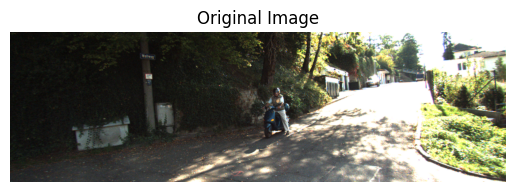

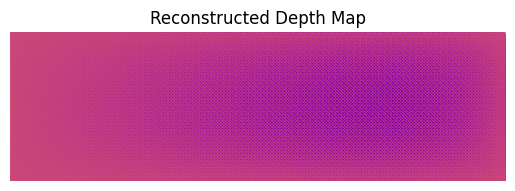

In [62]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess the input image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((192, 640)),  # Match training input size
        transforms.ToTensor(),          # Convert to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
    ])
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0).to(device)  # Add batch dimension

# Run inference
def run_inference(image_path, model, diffusion):
    # Preprocess the input image
    condition = preprocess_image(image_path)

    # Reverse the diffusion process to reconstruct the depth map
    model.eval()
    with torch.no_grad():
        reconstructed_depth = reverse_process(model, condition, diffusion.timesteps, diffusion)

    # Convert depth map to numpy for visualization
    reconstructed_depth = reconstructed_depth.squeeze().cpu().numpy()
    return reconstructed_depth

# Example usage
sample_image_path = r"..\data\KITTI eigen split\test\2011_09_26\2011_09_26_drive_0086_sync\image_02\data\0000000007.png"
depth_map = run_inference(sample_image_path, denoiser, diffusion)

# Visualize the reconstructed depth map
plt.imshow(Image.open(sample_image_path).convert('RGB'))
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.imshow(depth_map, cmap='plasma')
plt.title("Reconstructed Depth Map")
plt.axis('off')
plt.show()

In [63]:
depth_map

array([[-1.51152094e+13,  1.95476351e+12, -5.54975311e+12, ...,
        -4.16886722e+13,  2.10680899e+12,  5.88932492e+14],
       [ 1.36200323e+13, -5.91960369e+12,  8.54867886e+10, ...,
         5.77938076e+12, -6.14627562e+13,  9.50364946e+13],
       [ 3.55395076e+11,  6.71333286e+11, -6.21109314e+11, ...,
        -4.06503109e+12, -2.23136784e+13, -7.03306033e+12],
       ...,
       [ 1.84017245e+13, -8.10252501e+11,  1.06987166e+12, ...,
        -5.45359607e+12, -1.15532313e+13, -3.12563875e+13],
       [ 3.77818474e+12,  5.35339939e+12,  6.36067119e+11, ...,
        -1.45857328e+12, -1.36051289e+13, -5.95392442e+13],
       [ 1.11485062e+13,  3.34357103e+11,  2.80686546e+12, ...,
        -1.06225688e+13, -6.73595313e+12, -3.58629266e+13]], dtype=float32)

## Code Implementation: Depth Estimation using Pretrained Models <a class="anchor" id="sixth-bullet"></a>

In [64]:
sample_image_path = r"..\data\KITTI eigen split\test\2011_09_26\2011_09_26_drive_0086_sync\image_02\data\0000000007.png"

In [96]:
import torch
from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor
from transformers import DPTForDepthEstimation, DPTImageProcessor
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize the original image and depth map side-by-side
def visualize_depth(image, depth, title):
    # depth_min = depth.min()
    # depth_max = depth.max()
    # depth_normalized = (depth - depth_min) / (depth_max - depth_min)

    depth = depth.squeeze().cpu().numpy()
    depth_normalized = (depth - depth.min()) / (depth.max() - depth.min())

    # Plot original image and depth map side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(depth_normalized, cmap="viridis")
    plt.colorbar(label="Depth")
    plt.axis("off")
    plt.title(title)
    plt.show()

In [97]:
image = Image.open(sample_image_path).convert("RGB")

In [98]:
# Define a transform for MiDaS and Marigold
midas_transform = Compose([Resize((384, 384)), ToTensor()])

Running Depth Estimation with DPT...


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


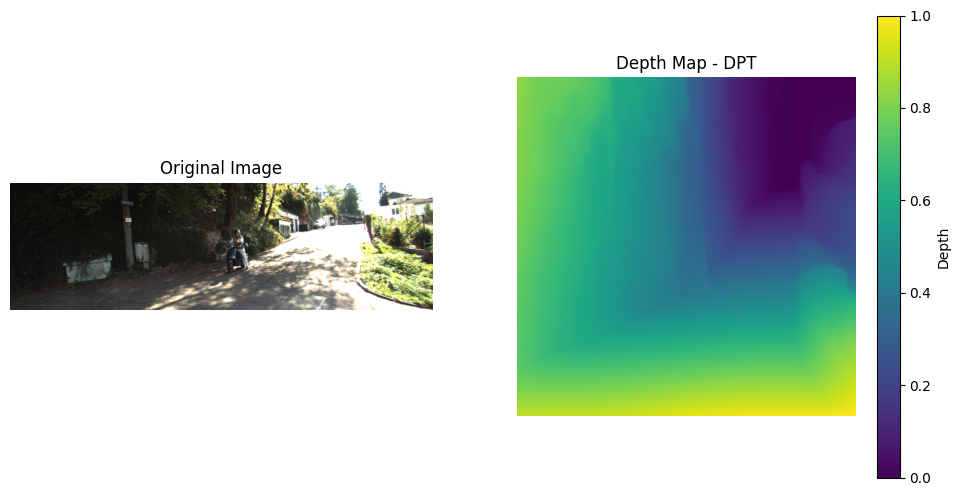

In [99]:
# Depth Estimation using DPT
print("Running Depth Estimation with DPT...")
dpt_model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")
dpt_processor = DPTImageProcessor.from_pretrained("Intel/dpt-large")
inputs = dpt_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = dpt_model(**inputs)
    dpt_depth = outputs.predicted_depth[0]
visualize_depth(image, dpt_depth, "Depth Map - DPT")

Running Depth Estimation with MiDaS...


Using cache found in C:\Users\Gus/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


Using cache found in C:\Users\Gus/.cache\torch\hub\facebookresearch_WSL-Images_main


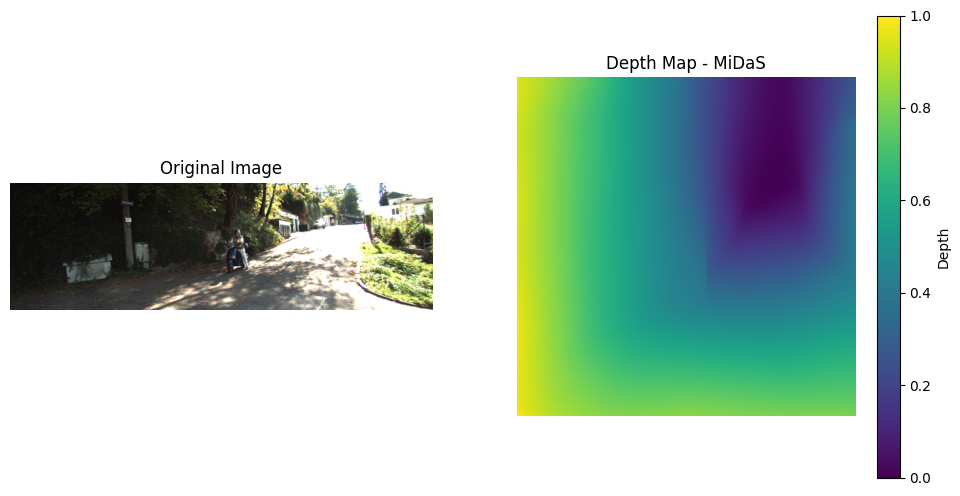

In [100]:
# Depth Estimation using MiDaS
print("Running Depth Estimation with MiDaS...")
midas_model = torch.hub.load("intel-isl/MiDaS", "MiDaS")
midas_model.eval()
input_batch = midas_transform(image).unsqueeze(0)

with torch.no_grad():
    midas_depth = midas_model(input_batch)
visualize_depth(image, midas_depth, "Depth Map - MiDaS")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Loading pipeline components...: 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]
Potentially unsupported `prediction_type='None'`; values supported by the pipeline: ('depth', 'disparity').
Marigold predictions...: 100%|██████████| 1/1 [00:00<00:00, 17.93it/s]


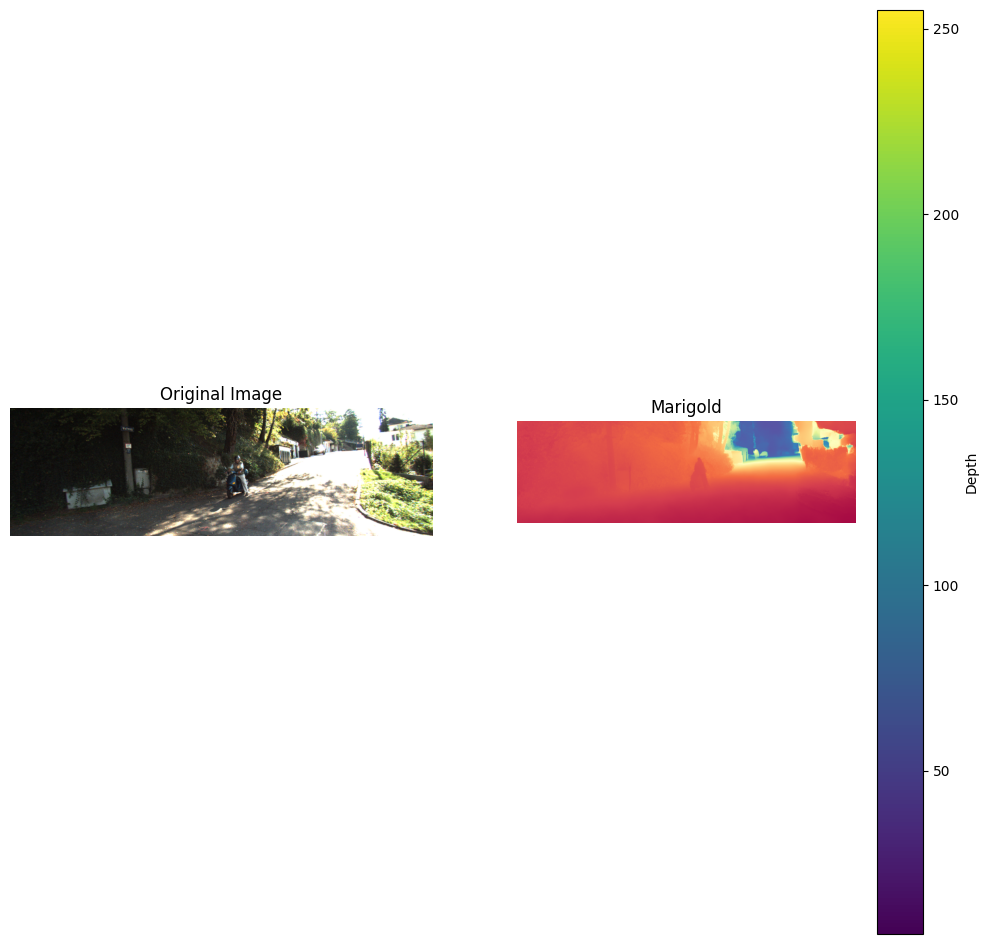

In [104]:
from diffusers import DiffusionPipeline
import diffusers

# Marigold Model
pipe = diffusers.MarigoldDepthPipeline.from_pretrained(
    "prs-eth/marigold-depth-lcm-v1-0", variant="fp16", torch_dtype=torch.float16
).to("cuda")

depth = pipe(image)
vis = pipe.image_processor.visualize_depth(depth.prediction)
vis[0].save("einstein_depth.png")

depth_16bit = pipe.image_processor.export_depth_to_16bit_png(depth.prediction)
depth_16bit[0].save("einstein_depth_16bit.png")


plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(vis[0], cmap="viridis")
plt.colorbar(label="Depth")
plt.axis("off")
plt.title("Marigold")
plt.show()

# plt.figure(figsize=(8, 8))
# plt.imshow(vis[0], cmap="inferno")
# plt.colorbar(label="Depth")
# plt.title("Marigold")
# plt.axis("off")
# plt.show()

# Latent Consistency Models (LCMs) in Marigold

Latent Consistency Models (LCMs) are a key innovation in the **Marigold** model for monocular depth estimation. They optimize the efficiency and performance of depth prediction tasks by enforcing consistency in latent space, leveraging diffusion models.

---

## What Are Latent Consistency Models?

LCMs predict structured outputs (like depth maps) by enforcing **consistency in the latent space** of a generative model. Unlike traditional diffusion models that work in pixel space, LCMs operate in **latent representations**, reducing computational costs while maintaining high accuracy.

---

## Key Components of LCMs

### 1. Latent Space Representation
- The input image is encoded into a lower-dimensional **latent space** using an encoder (e.g., CNN or Vision Transformer).
- This latent representation captures the essential information needed for reconstructing the output (e.g., depth map).

### 2. Consistency Regularization
- The model enforces **consistency** between latent representations at various steps of the diffusion process.
- Ensures the latent space remains stable and coherent under noise perturbations.

### 3. Simplified Diffusion Process
- Traditional diffusion models denoise noisy pixel-space inputs iteratively over hundreds of steps.
- LCMs reduce complexity by denoising in latent space, requiring only **2–5 steps** for inference.

### 4. Pretrained Latent Space
- LCMs utilize **pretrained generative models** like autoencoders or latent diffusion models (e.g., Stable Diffusion).
- These pretrained spaces provide semantic richness, improving generalization.

---

## How LCMs Work in Marigold

1. **Encoding the Image**:
   - The RGB input is passed through a pretrained encoder to produce a latent representation.
   
2. **Latent Diffusion**:
   - Noise is added to the latent representation, and the model learns to denoise it while maintaining consistency.

3. **Consistency Regularization**:
   - Enforces alignment between denoised latent representations and the expected structured output (e.g., depth maps).

4. **Decoding**:
   - The final denoised latent representation is decoded back into pixel space to generate the depth map.

---

## Advantages of LCMs

### 1. Computational Efficiency
- Latent space operations reduce dimensionality, making training and inference significantly faster.

### 2. High Accuracy
- Latent space consistency ensures structured and coherent outputs like depth maps.

### 3. Few-Step Diffusion
- Requires only 2–5 denoising steps, compared to hundreds in traditional diffusion models.

### 4. Robust Generalization
- Pretraining on diverse datasets enables the model to generalize across various environments and scenarios.

---

## Loss Functions in LCMs

1. **Reconstruction Loss**:
   - Measures the difference between the predicted depth and ground truth (e.g., L1 or MSE loss).
   
2. **Scale-Invariant Loss**:
   - Ensures accurate relative depth predictions, independent of absolute scale.

3. **Latent Space Consistency Loss**:
   - Enforces smoothness and alignment in latent space representations across noise levels.

---

## Why LCMs Are Used for Depth Estimation

- Depth maps require structured outputs that are spatially coherent.
- LCMs are ideal for this because they combine:
  - Generative power of diffusion models.
  - Efficiency of latent space operations.
  - Robustness via consistency regularization.

---

## Comparison: LCMs vs. Traditional Diffusion Models

| **Feature**              | **Traditional Diffusion Models** | **Latent Consistency Models (LCMs)** |
|--------------------------|----------------------------------|--------------------------------------|
| **Operating Space**       | Pixel space                    | Latent space                         |
| **Efficiency**            | Computationally expensive      | Faster (lower dimensions)            |
| **Denoising Steps**       | 50–100+ steps                 | 2–5 steps                            |
| **Output Structure**      | Implicitly learned             | Explicitly enforced via consistency  |
| **Generalization**        | Dataset-dependent              | Pretrained latent spaces             |

---

## Applications of LCMs in Depth Estimation

1. **Monocular Depth Estimation**:
   - Generate dense, high-quality depth maps from single RGB images.
   
2. **Augmented Reality (AR)**:
   - Provide depth-aware AR experiences with low latency.
   
3. **Robotics**:
   - Enable real-time navigation and obstacle avoidance.
   
4. **3D Scene Reconstruction**:
   - Create accurate 3D models from monocular inputs.

---

## Why LCMs Are Ideal for Marigold

The **Marigold model** uses LCMs to:
- **Leverage pretrained latent representations**, capturing semantic information efficiently.
- **Achieve zero-shot performance**, generalizing to unseen data without fine-tuning.
- **Provide fast and accurate depth estimation**, suitable for real-world applications like robotics and AR.

---

Latent Consistency Models represent a significant step forward in generative modeling, blending the power of diffusion models with latent space efficiency. They are particularly suited for structured prediction tasks like depth estimation.


## Datasets and Metrics <a class="anchor" id="eigth-bullet"></a>

### **Popular Datasets:**
1. **KITTI**: Outdoor scenes with LiDAR ground truth.
2. **NYU Depth V2**: Indoor depth data from structured light sensors.
3. **ScanNet**: 3D reconstruction and depth.
4. **Make3D**: Single-view depth estimation dataset.

### **Evaluation Metrics:**
1. **RMSE (Root Mean Squared Error)**: Measures absolute error.
2. **Absolute Relative Error (Abs Rel)**: Measures proportional differences.
3. **Logarithmic RMSE**: Measures log differences.
4. **Accuracy**: Fraction of pixels with error below a threshold.

## TLDR <a class="anchor" id="last-bullet"></a>

* Google Marigold - https://marigoldmonodepth.github.io/
* Pytorch Midas - https://pytorch.org/hub/intelisl_midas_v2/
* Google iris tracking and depth estimation - https://research.google/blog/mediapipe-iris-real-time-iris-tracking-depth-estimation/
* AR/VR with depth from motion - https://developers.google.com/ar/develop/depth
* Some SOTA - https://medium.com/@patriciogv/the-state-of-the-art-of-depth-estimation-from-single-images-9e245d51a315#:~:text=Researchers%20started%20training%20network%20models,depth%20from%20just%20one%20image
* Tutorial Depth Estimation (Marigold + DPT) - https://medium.com/@patriciogv/the-state-of-the-art-of-depth-estimation-from-single-images-9e245d51a315#:~:text=Researchers%20started%20training%20network%20models,depth%20from%20just%20one%20image

TODO:
- example of classic depth estimation using 2 camera pictures